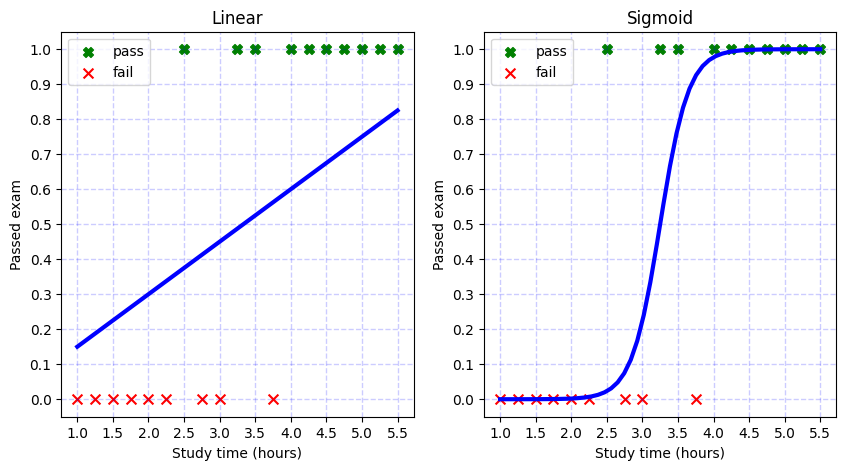

In [7]:
# Uvoz pandas modula za manipulaciju nad podacima.
# Alias pd za pandas se koristi po konvenciji.
import pandas as pd
# Uvoz pyplot modula za vizuelizaciju podataka.
# Alias plt za pyplot se koristi po konvenciji.
import matplotlib.pyplot as plt
# Uvoz numpy modula za rad sa visedimenzionim nizovima.
# Alias np za numpy se koristi po konvenciji.
import numpy as np
# Mapa boja (colormap) za bojenje funkcije greske
from matplotlib import cm
# Obican model Logističke regresije
from sklearn.linear_model import LogisticRegression
# Citanje .csv fajla i kreiranje DataFrame-a od njega.
# Zaglavlje .csv fajla predstavlja imena kolona DataFrame-a.
data = pd.read_csv('datasets/exam_pass.csv')
# Uzimamo sve redove (:) i kolonu hours.
# Predstavlja skup atributa neophodan za predikciju izlaza.
# ['hours'], a ne 'hours', jer hocemo DataFrame, a ne Series
X = data.loc[:, ['hours']]
# Uzimamo kolonu pass.
# Predstavlja skup labela za date primerke.
y = data['pass']
# Razdvajamo primerke na pass i fail.
y_pass = y[y == 1]
X_pass = X.iloc[y_pass.index]
y_fail = y[y == 0]
X_fail = X.iloc[y_fail.index]
# Generisanje 50 tacaka u opsegu min-max koje su podjednako udaljene.
x_min, x_max = np.min(X['hours']), np.max(X['hours'])
x_points = np.linspace(x_min, x_max, 50)
fig = plt.figure(figsize=(10, 5), facecolor='w', edgecolor='b')
# Figura sa dva subplot-a u matricnom prikazu 1 x 2, aktivna je 1.
axes_lin = fig.add_subplot(1, 2, 1)
axes_lin.grid(linestyle='--', linewidth=1, color='b', alpha=0.2)
axes_lin.set_xlabel('Study time (hours)')
axes_lin.set_xticks(np.arange(x_min - 0.5, x_max + 0.5, 0.5))
axes_lin.set_ylabel('Passed exam')
axes_lin.set_yticks(np.linspace(0, 1, 11))
# Prikazivanje primeraka i izlaznih labela.
axes_lin.scatter(X_pass, y_pass, s=50, c='g', marker='X', label='pass')
axes_lin.scatter(X_fail, y_fail, s=50, c='r', marker='x', label='fail')
y_points = np.array([x * 0.15 for x in x_points])
# Prikazivanje linearne funkcije za date podatke.
axes_lin.plot(x_points, y_points, linewidth=3, c='b')
axes_lin.set_title('Linear')
axes_lin.legend()
# Figura sa dva subplot-a u matricnom prikazu 1 x 2, aktivna je 2.
axes_log = fig.add_subplot(1, 2, 2)
axes_log.grid(linestyle='--', linewidth=1, color='b', alpha=0.2)
axes_log.set_xlabel('Study time (hours)')
axes_log.set_xticks(np.arange(x_min, x_max + 0.5, 0.5))
axes_log.set_ylabel('Passed exam')
axes_log.set_yticks(np.linspace(0, 1, 11))
# Prikazivanje primeraka i izlaznih labela.
axes_log.scatter(X_pass, y_pass, s=50, c='g', marker='X', label='pass')
axes_log.scatter(X_fail, y_fail, s=50, c='r', marker='x', label='fail')
x_points = np.linspace(x_min, x_max, 50)
# Definicija sigmoidne funkcije :
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
y_points = np.array([sigmoid((x - (x_min + (x_max - x_min) / 2)) * 5) 
for x in x_points])
# Prikazivanje sigmoid funkcije za date podatke.
axes_log.plot(x_points, y_points, linewidth=3, c='b')
axes_log.set_title('Sigmoid')
axes_log.legend()
# Prikazivanje i zatvaranje date figure.
plt.show()
plt.close(1)


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


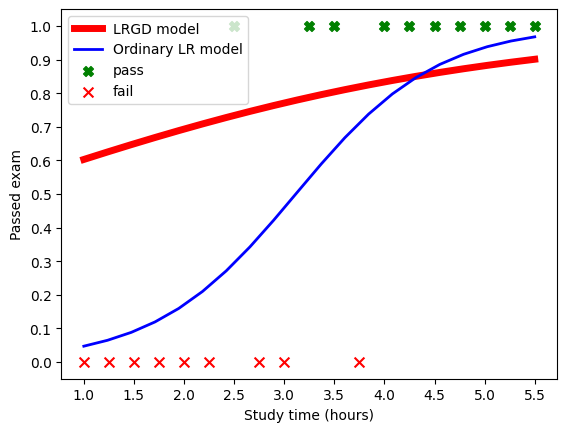

In [45]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1. / (1 + np.exp(-x))

def safe_log(arg, eps=1e-10):
    return np.log(np.where(arg > eps, arg, eps))
# Potrebno je napraviti predikciju ishoda polaganja ispita
# na osnovu vremena ucenja.
class LogisticRegressionGradientDescent:
     def __init__(self):
         self.coeff = None
         self.features = None
         self.target = None
         self.cost_history = None
     def set_coefficients(self, *args):
# Mapiramo koeficijente u niz oblika (n + 1) x 1
         self.coeff = np.array(args).reshape(-1, 1)
# y - labela, izlaz
# p - predikcija, verovatnoca
# m - broj primeraka (redova u DataFrame-u)
# n - broj razlicitih atributa (osobina)
# learning_rate - korak ucenja; dimenzije ((m x 1) x 1)
# korak ucenja je razlicit za razlicite koeficijente
# Cost = - y * ln (p) - (1 - y) * ln (p)
# Generalizovani Cost (po svim primercima):
# Cost = 1 / m * sum (- yi * ln (pi) - (1 - yi) * ln (1 - pi))
# Cost = - 1 / m * sum (yi * ln (pi) + (1 - yi) * ln (1 - pi))
# features - dimenzije (m x (n + 1)); n + 1 je zbog koeficijenta c0
# self.coeff - dimenzije ((n + 1) x 1))
# predicted - dimenzije (m x (n + 1)) x ((n + 1) x 1) = (m x 1)
     def cost(self):
         predicted = sigmoid(self.features.dot(self.coeff))
         cost = -1. / len(self.features) * \
(np.dot(self.target.T, safe_log(predicted)) +
np.dot((1 - self.target).T, safe_log(1 - predicted))).sum()
         return predicted, cost
# Za minimizaciju Cost-a koristice se gradijentni spust.
# Za azuriranje koeficijenata koristice se formula: 
# cj = cj - lr * der(Cost)/der(cj), gde je lr korak ucenja.
# Ukoliko je korak veliki, moze da dodje do divergiranja,
# a ako je korak premali, moguce je da se nikad ne konvergira.
# Minus znak je zato sto ako je izvod negativan,
# to znaci da funkcija opada za rast argumenta i treba nastaviti 
# tim smerom, odnosno ako je izvod pozitivan, to znaci da funkcija raste, 
# pa treba izabrati suprotni smer.
#
# p = 1 / (1 + e^-y)
# der(Cost)/der(p) = - 1 / m * sum( (1 - yi) / (pi - 1) + yi / pi )
# der(p)/der(y) = der(1 / (1 + e^-y)) = der(e^y / (e^y + 1)) =
# = (der(e^y) * (e^y + 1) - e^y * der(e^y + 1)) / (e^y + 1)^2 =
# = (e^2y + e^y - e^y * e^y) / (e^y + 1)^2 =
# = e^y / (e^y + 1)^2 = p * (1 - p)
# der(y)/der(cj) = (0 | xj)
# gradient[j] = der(Cost)/der(cj) = 
# = der(Cost)/der(p) * der(p)/der(y) * der(y)/der(cj) =
# = - 1 / m * sum( (1 - yi) / (pi - 1) + yi / pi ) * pi * (1 - pi) * xj =
# = 1 / m * sum( (1 - yi) / (pi - 1) + yi / pi ) * pi * (pi - 1) * xj =
# = 1 / m * sum( (1 - yi) * pi + yi * (pi - 1) ) * xj =
# = 1 / m * sum( pi - pi * yi + yi * pi - yi ) * xj =
# = 1 / m * sum( pi - yi ) * xj
# Konacno, cj = cj - lr * 1 / m * sum( pi - yi ) * xj
# Jedan korak u algoritmu gradijentnog spusta.
     def gradient_descent_step(self, learning_rate):
         predicted, cost = self.cost()
# (predicted - self.target); dimenzije (m x 1)
# features - dimenzije (m x (n + 1)); 
# transponovana matrica ima dimenzije ((n + 1) x m)
# gradient - dimenzije ((n + 1) x m) x (m x 1) = (n + 1) x 1
# gradient[j] = (1 / m) * sum( y_predicted - y_target ) * features[j]
         gradient = 1. / len(self.features) * \
         np.dot(self.features.T, (predicted - self.target))
         self.coeff = self.coeff - learning_rate * gradient
         return self.coeff, cost
    # koeficijeni se azuriraju po formuli: 
# coeff[j] = coeff[j] - learning_rate * gradient[j]
# za j-ti koeficijent koji mnozi j-ti atribut 
# gledaju se samo vrednosti j-tog atributa za sve primerke
     def perform_gradient_descent(self, learning_rate, num_iterations=100):
         self.cost_history = []
         for _ in range(num_iterations):
             _, curr_cost = self.gradient_descent_step(learning_rate)
             self.cost_history.append(curr_cost)
             return self.coeff, self.cost_history
# features mora biti DataFrame

    
     def fit(self, features, target):
         self.features = features.copy(deep=True)
# Pocetna vrednost za koeficijente je 0.
# self.coeff - dimenzije ((n + 1) x 1)
         self.coeff = np.zeros(shape=(len(features.columns) + 1)).reshape(-1, 1)
# Unosi se kolona jedinica za koeficijent c0,
# kao da je vrednost atributa uz c0 jednaka 1.
         self.features.insert(0, 'c0', np.ones((len(features), 1)))
# self.features - dimenzije (m x (n + 1))
         self.features = self.features.to_numpy()
# self.target - dimenzije (m x 1)
         self.target = target.to_numpy().reshape(-1, 1)
# Predvidjanje izlaza (klase pripadanja). Argument mora biti DataFrame.
    
     def predict(self, features):
         features = features.copy(deep=True)
         features.insert(0, 'c0', np.ones((len(features), 1)))
         features = features.to_numpy()
         return [1 if v > 0.5 else 0
                 for v in sigmoid(features.dot(self.coeff).reshape(-1, 1).flatten())]
# Predvidjanje verovatnoca pripadanja klasi. Argument mora biti DataFrame.
     def predict_proba(self, features):
         features = features.copy(deep=True)
         features.insert(0, 'c0', np.ones((len(features), 1)))
         features = features.to_numpy()
         return sigmoid(features.dot(self.coeff).reshape(-1, 1).flatten())
# Generisanje 20 vrednosti za x osu podjednako udaljenih
# u opsegu [0, maksimalan_broj_sati_ucenja]
# koje ce predstavljati vreme ucenja
# za koje se radi predikcija
spots = 20
samples = pd.DataFrame(
data=np.linspace(min(X['hours']), max(X['hours']), num=spots)
)
# Kreiranje i obucavanje modela
lrgd = LogisticRegressionGradientDescent()
lrgd.fit(X, y)
learning_rates = np.array([[0.7], [0.65]])
res_coeff, cost_history = lrgd.perform_gradient_descent(
learning_rates, 100
)
# Vizuelizacija modela
plt.figure('Logistic Regression')
line, = plt.plot(samples[0], lrgd.predict_proba(samples), lw=5, c='red')
line.set_label('LRGD model')
# Kreiranje o obucavanje sklearn.LogisticRegression modela
lr_model = LogisticRegression()
lr_model.fit(X, y)
# Vizuelizacija modela
line, = plt.plot(
samples[0], lr_model.predict_proba(samples)[:, 1], lw=2, c='blue'
)
plt.scatter(X_pass, y_pass, s=50, c='g', marker='X', label='pass')
plt.scatter(X_fail, y_fail, s=50, c='r', marker='x', label='fail')
line.set_label('Ordinary LR model')
plt.xlabel('Study time (hours)')
plt.ylabel('Passed exam')
plt.xticks(np.arange(x_min, x_max + 0.5, 0.5))
plt.yticks(np.linspace(0, 1, 11))
plt.legend(loc='upper left')
plt.show()
plt.close(1)


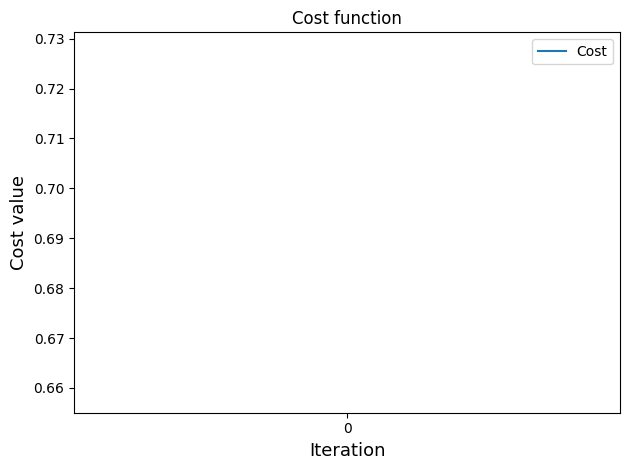

In [46]:
# Vizuelizacija Cost funkcije kroz iteracije
# za model koji koristi gradijentni spust.
plt.figure('Cost')
plt.plot(np.arange(0, len(cost_history), 1), cost_history)
plt.xlabel('Iteration', fontsize=13)
plt.ylabel('Cost value', fontsize=13)
plt.xticks(np.arange(0, len(cost_history), 2))
plt.title('Cost function')
plt.tight_layout()
plt.legend(['Cost'])
plt.show()
plt.close('Cost')

Min cost is 0.30 for c0 = -7.07 and c1 = 2.26


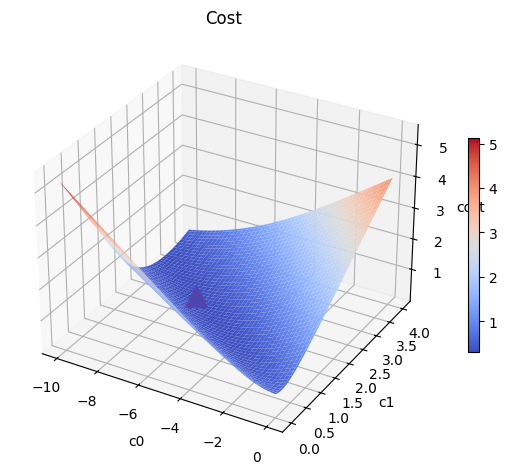

In [48]:
# Vizuelizacija Cost funkcije
# u zavisnosti od vrednosti koeficijenata c0 i c1.
# Pravimo meshgrid, odnosno kombinacije svake dve vrednosti:
# c0 = -10, c1 = 0; c0 = 10, c1 = 0.04 ... ;
# c0 = -9.9, c1 = 0; c0 = -9.9, c1 = 0.04 ...;
# ...
# c0 = 0, c1 = 4; ...
spots = 100
c0, c1 = np.meshgrid(np.linspace(-10, 0, spots), np.linspace(0, 4, spots))
# Od visedimenzionih nizova pravimo jednodimenzione nizove
c0 = c0.flatten()
c1 = c1.flatten()
cost_values = []
for i in range(len(c0)):
    lrgd.set_coefficients(c0[i], c1[i])
    cost_values.append(lrgd.cost()[1])
    fig = plt.figure('Cost hyperplane')
# U okviru figure-a dodaju se axes-i (subplot-ovi u okviru plot-a).
# Figure objekat je 1x1, a trenutni axes je 1 (numeracija krece od 1).
ax = plt.subplot(1, 1, 1, projection='3d')
surf = ax.plot_surface(c0.reshape(spots, spots), c1.reshape(spots, spots),
np.array(cost_values).reshape(spots, spots),
cmap=cm.coolwarm)
min_cost_ind = cost_values.index(min(cost_values))
ax.scatter(c0[min_cost_ind], c1[min_cost_ind], cost_values[min_cost_ind],
c='r', s=250, marker='^')
print(f'Min cost is {cost_values[min_cost_ind]:.2f} '
f'for c0 = {c0[min_cost_ind]:.2f} and c1 = {c1[min_cost_ind]:.2f}')
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel('c0')
ax.set_ylabel('c1')
ax.set_zlabel('cost')
plt.title('Cost')
plt.tight_layout()
plt.show()
plt.close('Cost hyperplane')


In [51]:
# Testiranje predikcije oba modela nad jednim uzorkom
# pass = sigmoid(c1 * hours + c0)
example_hours = 3
example = pd.DataFrame(data=[example_hours])
lrgd.set_coefficients(res_coeff)
print(f'LRGD pass prediction for studying {example_hours} hours is '
f'{lrgd.predict(example)[0]} '
f'with probability {lrgd.predict_proba(example)[0]:.2f}')
print(f'LRGD c0: {lrgd.coeff.flatten()[0]:.2f}, '
f'c1: {lrgd.coeff.flatten()[1]:.2f}')
print(f'LR pass prediction for studying {example_hours} hours is '
f'{lr_model.predict(example)[0]} '
f'with probability {lr_model.predict_proba(example)[0][0]:.2f}')
print(f'LR c0: {lr_model.intercept_[0]:.2f}, '
      f'c1: {lr_model.coef_[0][0]:.2f}')

# Ispis:
# LRGD pass prediction for studying 3 hours is 1 with probability 0.51
# LRGD c0: -3.95, c1: 1.33
# LR pass prediction for studying 3 hours is 0 with probability 0.54
# LR c0: -4.44, c1: 1.42
# Stampanje cost za oba modela
lrgd.set_coefficients(res_coeff)
print(f'LRGD Cost: {lrgd.cost()[1]:.2f}')
lrgd.set_coefficients(
np.concatenate((np.array([lr_model.intercept_]), lr_model.coef_))
)
print(f'LR Cost: {lrgd.cost()[1]:.2f}')
# Restauracija koeficijenata
lrgd.set_coefficients(res_coeff)
# Ispis:
# LRGD Cost: 0.34
# LR Cost: 0.33
# Racunanje score-a za oba modela 
# kreiraj pass_test i dodaj jer nisam
data_test = pd.read_csv('datasets/exam_pass.csv')
X = data_test[['hours']]
y = data_test['pass']
# Zapamte se koeficijenti LR modela,
# da bi se postavili LRGD koeficijenti i izracunao LR score.
lr_coef_ = lr_model.coef_
lr_int_ = lr_model.intercept_
lr_model.coef_ = lrgd.coeff[1:]
lr_model.intercept_ = lrgd.coeff[0]
print(f'LRGD score: {lr_model.score(X, y):.2f}')
# Restauriraju se koeficijenti LR modela.
lr_model.coef_ = lr_coef_
lr_model.intercept_ = lr_int_
print(f'LR score: {lr_model.score(X, y):.2f}')
# Ispis:
# LRGD score: 0.90
# LR score: 1.00


LRGD pass prediction for studying 3 hours is 1 with probability 0.77
LRGD c0: 0.02, c1: 0.40
LR pass prediction for studying 3 hours is 0 with probability 0.54
LR c0: -4.44, c1: 1.42
LRGD Cost: 0.68
LR Cost: 0.33
LRGD score: 0.53
LR score: 0.89


C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
